# Linear regression

- Solving linear equations
- Linear regression

References:
- https://numpy.org/doc/stable/reference/routines.linalg.html

In [2]:
# We will use NumPy and matplotlib for this lecture
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
np.random.seed(1234) # set the random seed to make the random numbers predictable

## Solving Linear Equations

One of the most fundamental tasks in applied mathematics is solving linear systems of the form 

$$\mathbf{A}\mathbf{x} = \mathbf{b}\;,$$

where $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\mathbf{x} \in \mathbb{R}^{m}$, and $\mathbf{b} \in \mathbb{R}^{n}$. This equation represents a set of linear relationships between variables, a single one of which looks like this: 

$$
a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{im}x_m = b_i\;.
$$

Collectively, the equations in a linear system define a "flat space" called a *linear subspace* of $\mathbb{R}^m$.  

1. When $\mathbf{A}$ is square and of full rank (determinant nonzero), this equation has a unique solution. 
2. When $\mathbf{A}$ is not square or not of full rank, then this equation may have either 0 or infinitely many solutions. 

In Case 1 ("the good case"), we can use a simple built-in `numpy` method: `np.linalg.solve`. 

In [3]:
# solve A@x = b for x => x = inv(A)*b

n = 5

A = np.random.randint(1, 5, size = (n, n))
b = np.random.randint(1, 5, size = n)

# x = LA.solve(A, b)
# x

In [5]:
b

array([1, 2, 4, 3, 3])

In [6]:
x = LA.solve(A, b)
x

array([ 1.95, -2.75,  1.4 ,  0.5 , -1.  ])

In [ ]:
print(A)
print(b)

In [7]:
np.allclose(A @ x, b)

True

In [8]:
print(A@x - b)

[0. 0. 0. 0. 0.]


In [9]:
# manual approach (not as efficient)
# compute the inverse explicitly and 
# premultiply by it
# It is usually not a good idea to use inv(A) directly.

x_ = LA.inv(A) @ b
np.allclose(x_, x)

True

In Case 2 ("the bad case"), in which the matrix is either not of full rank or not square, we need to resort to subtler means. Suppose that the matrix $\mathbf{A}$ has more rows than columns: 

In [10]:
A = np.random.randint(1, 5, size = (n, n-1))
A

array([[4, 3, 1, 4],
       [1, 2, 3, 3],
       [3, 4, 4, 4],
       [1, 2, 4, 1],
       [4, 3, 4, 1]])

In this case, there usually are no exact solutions to the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$. If we try the method from before, `numpy` will complain at us: 

In [11]:
# this will not work
x = LA.solve(A, b) 

LinAlgError: Last 2 dimensions of the array must be square

One of the most common ways to approach this kind of problem is to compute the *least-squares approximation*, which is the minimizer $\mathbf{x}$ of the function 

$$f(\mathbf{x}) = \lVert \mathbf{A}\mathbf{x} - \mathbf{b} \rVert^2\; = \sum_i \left(b_i - \sum_j a_{ij} x_{j}\right)^2.$$

Note that, if $\mathbf{b} \in \text{range}(\mathbf{A})$; that is, if $\mathbf{b}$ is one of those lucky values such that $\mathbf{A}\mathbf{x} = \mathbf{b}$ does indeed have an exact solution, then we can choose $\mathbf{x}$ such that $f(\mathbf{x}) = 0$ by finding the exact solution. 

Otherwise, we need to satisfy ourself with an approximation, i.e. a value $\mathbf{x}$ such that $f(\mathbf{x}) > 0$. 

In [12]:
print(A.shape)
print(b.shape)

(5, 4)
(5,)


In [13]:
# compute the solution x, error f(x), rank of A, and singular values of A
x, fx, rank, s = np.linalg.lstsq(A, b, rcond = None)

In [14]:
# approximate solution
x 

array([-0.64925373,  1.82089552,  0.14676617, -0.49004975])

In [15]:
print(A @ x) # should be close to the below
print(b)

[1.05223881 1.96268657 3.96268657 3.08955224 2.96268657]
[1 2 4 3 3]


## Application: Linear Regression

Actually, the problem of minimizing $f(\mathbf{x}) = \lVert \mathbf{A}\mathbf{x} - \mathbf{b} \rVert^2$ has a special name in statistics -- it's linear regression! Specifically, it's *orderinary least-squares multvariate linear regression*.  It's usually written like this: 

$$J(\beta) = \lVert \mathbf{X}\beta - \mathbf{y} \rVert^2\;,$$

where $\mathbf{X}$ is the design matrix of observations of the dependent variables, and $\mathbf{y}$ is the vector of observations of the dependent variable. $\beta$ is the vector of coefficients, and it's the thing that we want to estimate. We do this by finding an estimate $\hat{\beta}$ that makes $J(\hat{\beta})$ small. 

This function $J$ is called the *square-error loss* for estimating $\mathbf{y}$, and is probably the most important of all loss functions for regression tasks. 

Let's use least-squares approximation to perform 1d linear regression "by hand": 

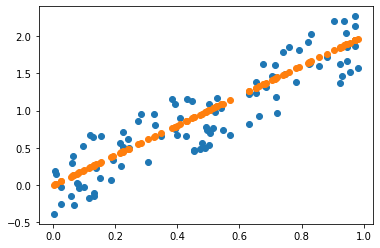

In [22]:
# generate the data
# y = beta*x 
n = 100
x = np.random.rand(n)
beta = 2
y = beta*x + np.random.rand(n) - 0.5
y_exact = beta*x
plt.scatter(x, y)
plt.scatter(x, y_exact)

In [23]:
# formally, x needs to be 2d for this to work
# so we give it an extra dimension using reshape
x = x.reshape(n, 1)

beta_estimate = np.linalg.lstsq(x, y, rcond = None)[0]

In [24]:
print(beta_estimate)

[1.92849763]


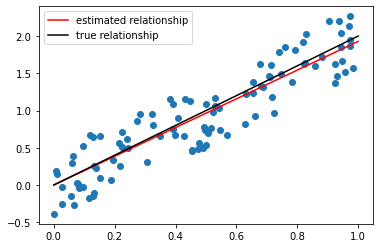

In [25]:
plt.scatter(x, y)
plt.gca().plot(np.linspace(0, 1), beta_estimate*np.linspace(0, 1), color = "red", label = "estimated relationship")
plt.gca().plot([0,1], [0,2], color = "black", label = "true relationship")
plt.legend()

This works in any number of dimensions! 

In fact, this least-squares problem has an analytic solution in terms of matrix inverses as well, given by 

$$
\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}\;.
$$

This matrix computation is easy to implement in Python using tools from the previous section. Rather than creating a plot, let's show how we perform multidimensional regression and recover an estimate of the coefficient vector $\beta$. 

beta=[1 2 3 4]
(100, 4)
(100,)


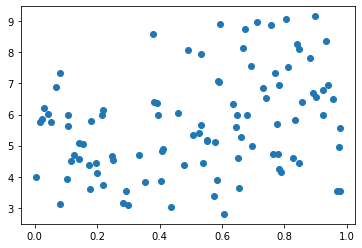

In [32]:
# y = beta[0] + beta[1]*x0 + beta[2]*x1+ beta[3]*x2
beta = np.arange(1,5) # generate [1,2,3,4]
n = 100
x = np.random.rand(n,3)
X = np.hstack((np.ones((n,1)), x))

y = X @ beta + np.random.rand(n) - 0.5

yexact = X @ beta
print("beta={}".format(beta))
print(X.shape)
print(y.shape)
plt.scatter(X[:,1], y)

# plt.scatter(X[:,1], yexact)

In [33]:
# np.random.seed(1234)
def least_squares(X, y):
    # X is n x 4, X.T is 4 x N, 
    # X.T @ X is 4 x 4
    # np.linalg.inv(X.T @ X) @ (X.T) is 4 x N
    # the returned object is a numpy array of 4 elements
#     return np.linalg.inv(X.T @ X) @ (X.T) @ y
    return np.linalg.solve(X.T@X, X.T@y)

# multidimensional data

n = 100
x = np.random.rand(n,3)
X = np.hstack((np.ones((n,1)), x))

# true value of beta is [1,2,3,4]
beta = np.arange(1,5)
y = X @ beta + np.random.rand(n) - 0.5

yexact = X @ beta

beta_hat = least_squares(X, y)
beta, beta_hat

beta_estimate = np.linalg.lstsq(X, y, rcond = None)[0]
print(beta_estimate)

[1.07535827 1.93549676 2.91003602 3.96875542]


The reason that `numpy` implements a specialized least-squares function like `lstsq` is that the analytic approach can be impractical to compute when the number of columns in `X` is large, as matrix inversion is a very slow operation. 